In [120]:
# import data
data <- read.csv(file="/content/sample_data/BME 501 Final 2021 Dataset P1.csv", header=T)
predata <- read.csv(file='/content/sample_data/adjustedPredictData.csv',header=T)
data <- na.omit(data)
data$deg_malig <- as.factor(data$deg_malig)
data$menopause <- as.factor(data$menopause)
data$node_caps <- as.factor(data$node_caps)
data$breast <- as.factor(data$breast)
data$breast_quad <- as.factor(data$breast_quad)
data$irradiat <- as.factor(data$irradiat)
data$class_num <- as.factor(data$class_num)

# 1
oh_deg_malig <- model.matrix(~deg_malig-1,data)
oh_irradiat <- model.matrix(~irradiat-1,data)
oh_classnum <- model.matrix(~class_num-1,data)

library(dplyr)

dimnames(oh_deg_malig)<-NULL
dimnames(oh_irradiat)<-NULL
dimnames(oh_classnum)<-NULL
pd <- predata$X

data2 <- cbind(data$tumor_size,data$inv_nodes,oh_deg_malig,oh_irradiat)

traininput <- data2[1:222,]
trainoutput <- oh_classnum[1:222,]
#trainoutput <- data$class_num[1:222]
trainoutputr <- pd[1:222]

testinput <- data2[223:277,]
testoutput <- oh_classnum[223:277,]
#testoutput <- data$class_num[223:277]
testoutputr <- pd[223:277]

In [10]:
# 2
#install.packages('keras')
library(keras)


In [15]:
model <- keras_model_sequential()
model %>%
    layer_dense(units=4, activation='relu', input_shape = c(7)) %>%
    layer_dropout(rate = 0.01) %>%
    layer_batch_normalization() %>%
    layer_dense(units=1, activation='sigmoid')
summary(model)

Model: "sequential_1"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3 (Dense)                    (None, 4)                       32          
                                                                                
 dropout_1 (Dropout)                (None, 4)                       0           
                                                                                
 batch_normalization_1 (BatchNormal  (None, 4)                      16          
 ization)                                                                       
                                                                                
 dense_2 (Dense)                    (None, 1)                       5           
                                                                                
Total params: 53
Trainable params: 45
Non-trainable params: 8
_________________________

In [16]:
model %>% compile(
  loss = 'mean_squared_error',
  optimizer = 'adam',#(learning_rate = 0.01),
  metrics = c('accuracy')
)

`geom_smooth()` using formula 'y ~ x'



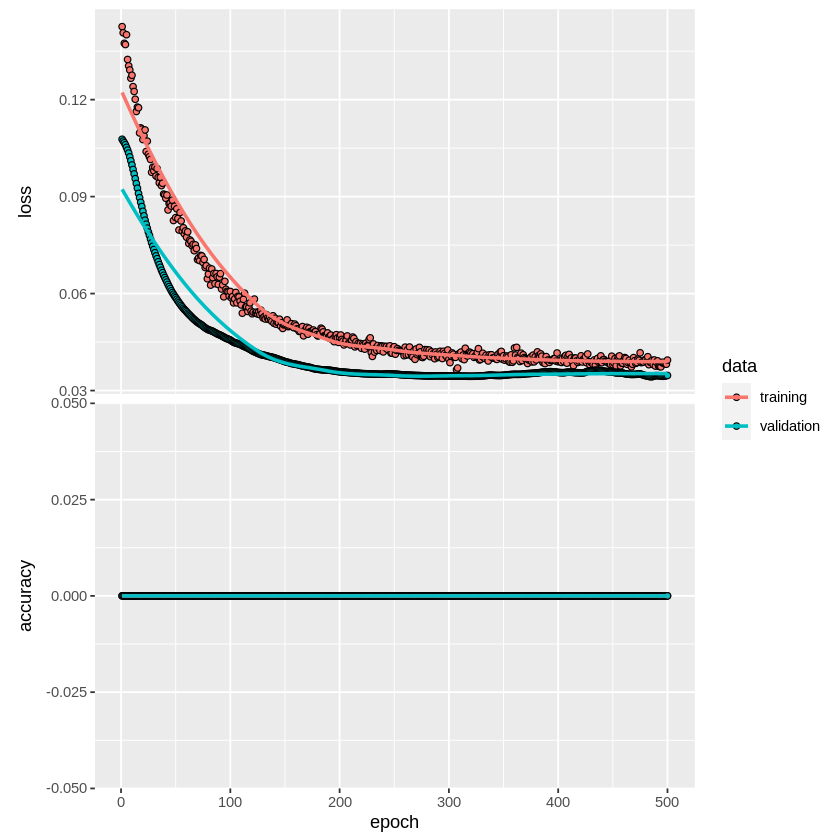

In [19]:
history <- model %>% fit(
  traininput, trainoutputr, 
  epochs = 500, batch_size = 120, 
  validation_split = 0.2
)
plot(history)

In [20]:
model %>% evaluate(testinput, testoutputr)

loss accuracy 
     NaN        0

In [21]:
rennpre <- model %>% predict(testinput)

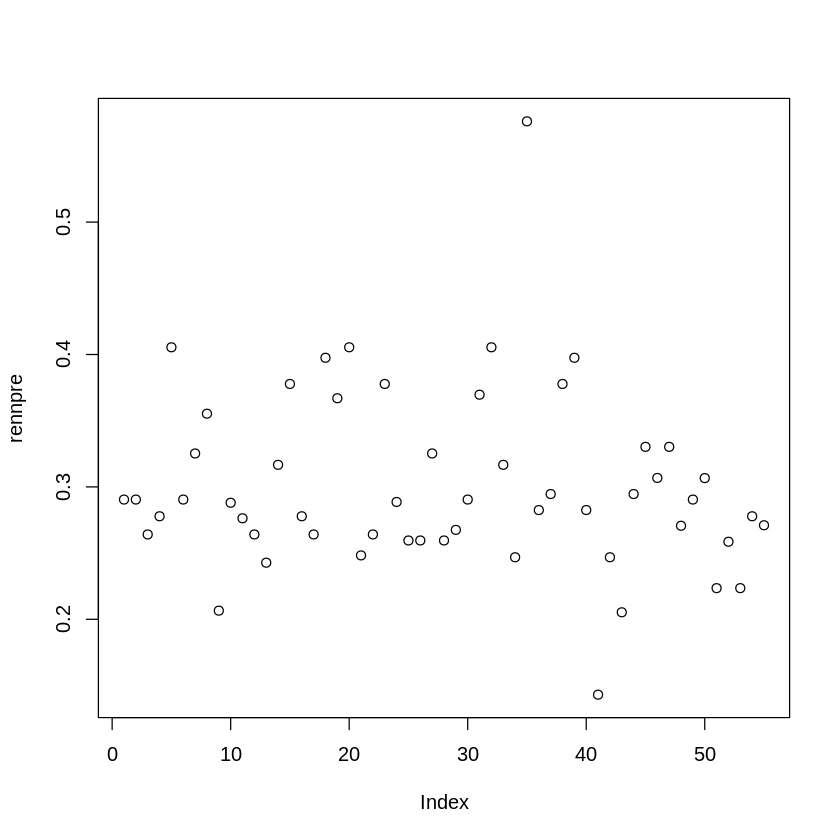

In [22]:
plot(rennpre)

Setting levels: control = 0, case = 1

Warning message in roc.default(data$class_num[223:277], rennpre):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls > cases



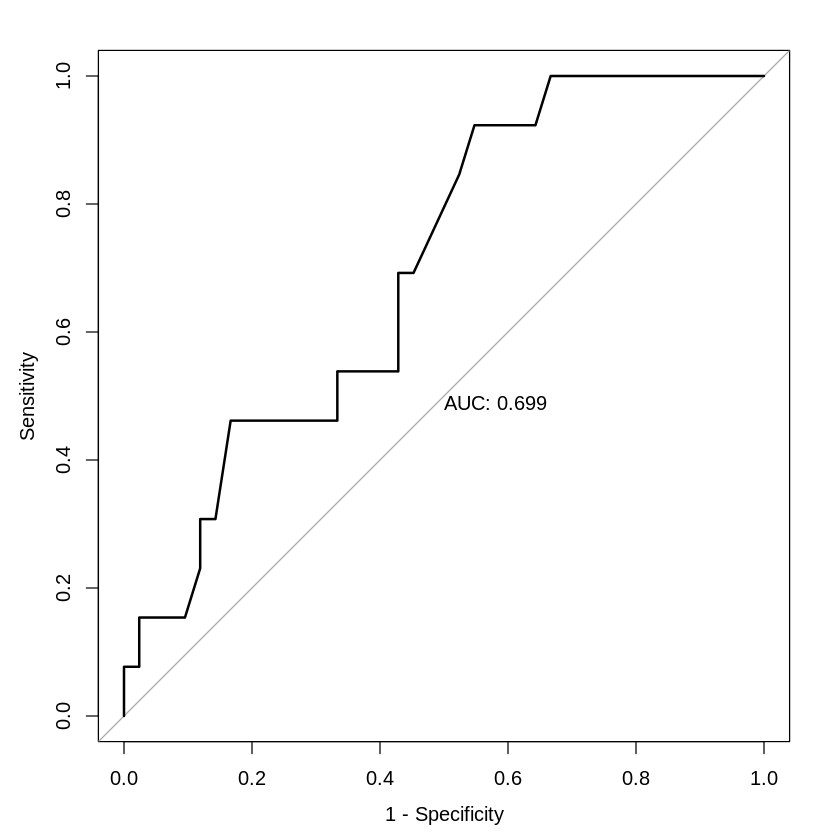

In [27]:

library(pROC)
optRoc <- roc(data$class_num[223:277], rennpre)
plot(optRoc, print.auc=TRUE, legacy.axes=TRUE)

In [137]:
model2 <- keras_model_sequential()
model2 %>%
    layer_dense(units=4, activation='relu', input_shape = c(7)) %>%
    layer_dropout(rate = 0.01) %>%
    layer_batch_normalization() %>%
    layer_dense(units=2, activation='softmax')
summary(model2)

Model: "sequential_12"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_25 (Dense)                   (None, 4)                       32          
                                                                                
 dropout_12 (Dropout)               (None, 4)                       0           
                                                                                
 batch_normalization_12 (BatchNorma  (None, 4)                      16          
 lization)                                                                      
                                                                                
 dense_24 (Dense)                   (None, 2)                       10          
                                                                                
Total params: 58
Trainable params: 50
Non-trainable params: 8
________________________

In [138]:
model2 %>% compile(
  loss = 'binary_crossentropy',
  #optimizer = 'adam',
  optimizer = optimizer_rmsprop(learning_rate = 0.01),
  metrics = c('accuracy')
)

`geom_smooth()` using formula 'y ~ x'



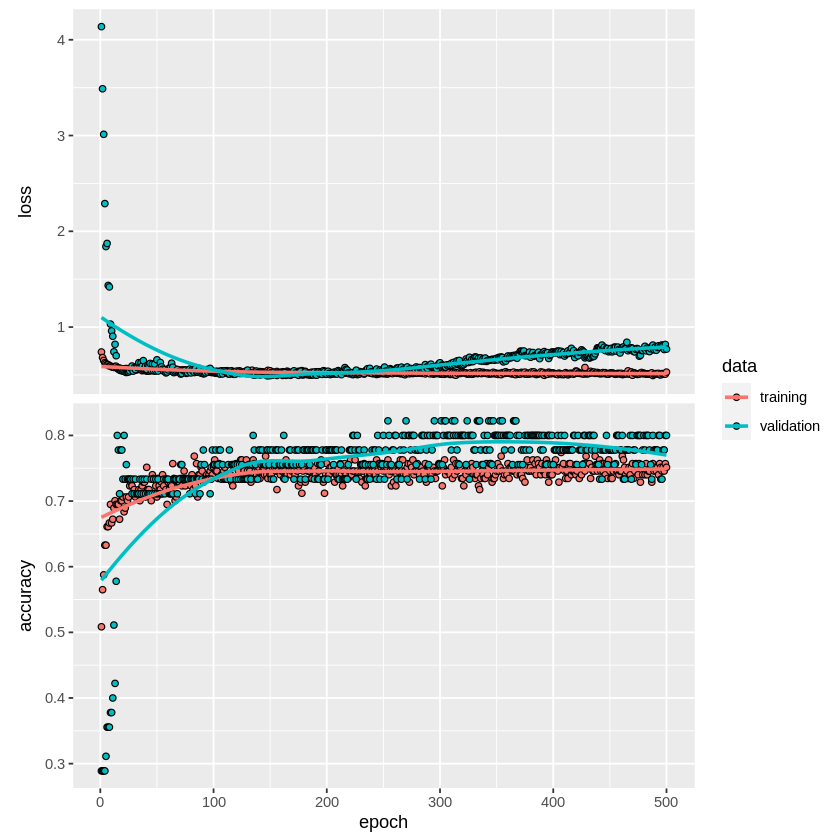

In [139]:
history <- model2 %>% fit(
  traininput, trainoutput, 
  epochs = 500, batch_size = 120, 
  validation_split = 0.2
)
plot(history)

In [127]:
model2 %>% evaluate(testinput, testoutput)

loss accuracy 
 0.46251  0.80000

In [128]:
clapre <- model2 %>% predict(testinput)

In [146]:
clabi = c(rep(1,50))
for (i in 1:55) {
  if (clapre[i,1] > clapre[i,2]) {
    clabi[i] = 0
  }
  else {
    clabi[i] = 1
  }
}

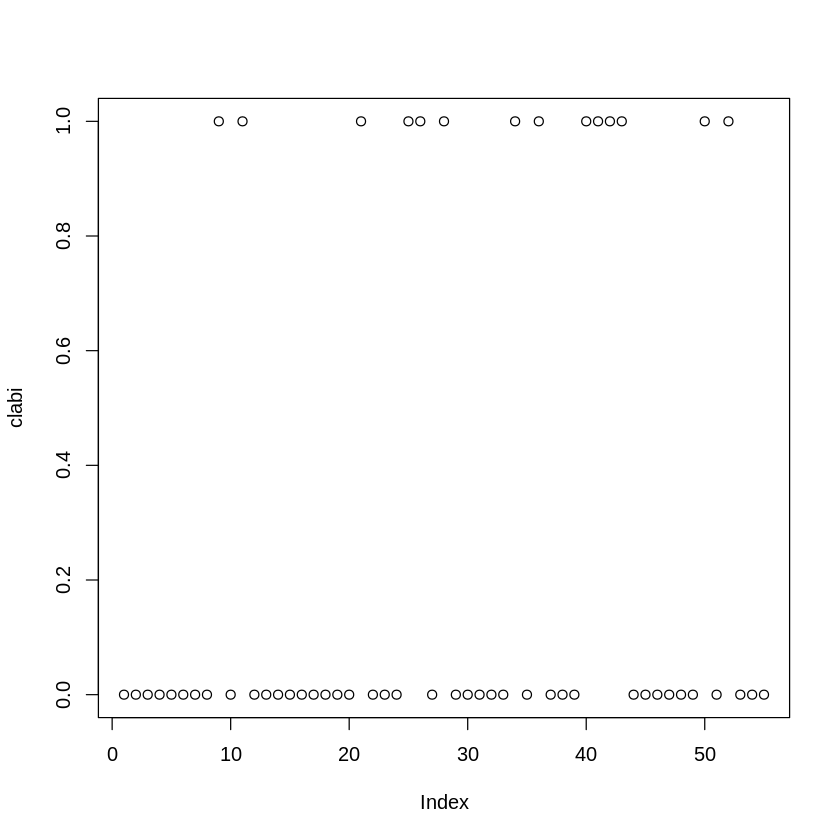

In [147]:
plot(clabi)

In [149]:
j =0
for (i in 1:55) {
  if (data$class_num[222+i] == clabi[i]) {
    j = j +1
  }
}
paste('correct ratio =',j/55)

[1] "correct ratio = 0.8"